In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import make_moons

In [3]:
# X, Y = make_moons(n_samples = 500, noise = 0.1)
# print(X.shape)
# print(y)

# df = pd.DataFrame(dict(x=X[:,0], y = X[:,1], label=Y))
# colors = {0:'red', 1:'blue'}
# fig, ax  = plt.subplots()
# grouped  = df.groupby('label')
# for key, group in grouped:
#     group.plot(ax=ax, kind='scatter', x = 'x', y = 'y', label=key, color=colors[key])
# plt.show()


(500, 2)


In [13]:
class cluster:
    def __init__(self, distFunc, eps: float, minPts: int) -> None:
        self.distFunc = distFunc
        self.eps = eps
        self.minPts = minPts
    
    def dbscan(self, db):
        labels = [None]*len(db)
        c = 0
        for i in range(len(db)):
            if labels[i] is not None:
                continue
            neighbours = self.RangeQuery(db, i)
            if len(neighbours)<self.minPts:
                labels[i] = 0
                continue
            c = c+1
            labels[i]=c
            seedset = neighbours
            for itr in seedset:
                if labels[itr]==0:
                    labels[itr]=c
                if labels[itr] is not None:
                    continue
                labels[itr] = c
                neighbours = self.RangeQuery(db,itr)
                if len(neighbours)>self.minPts:
                    for neigh in neighbours:
                        if neigh not in seedset:
                            seedset.append(neigh)
        return labels,c


                

    
    def RangeQuery(self, db, j):
        neighbours = []
        for i in range(len(db)):
            if self.distFunc(db[i], db[j]) < self.eps:
                neighbours.append(i)
        return neighbours
    def plotRes(self,data, clusterRes, clusterNum):
        nPoints = len(data)
        scatterColors = ['black', 'lime', 'purple', 'green', 'cyan', 'red', 'yellow','blue','orange','violet','pink','brown']
        for i in range(clusterNum+1):
            x1 = [];  y1 = []
            for j in range(nPoints):
                if clusterRes[j] == i:
                    x1.append(data[j, 0])
                    y1.append(data[j, 1])
            plt.scatter(x1, y1, c=scatterColors[i%12], alpha=1, marker='.')
        plt.show()





In [14]:
# def RangeQuery(db, distFunc, j, eps):
#         neighbours = []
#         for i in range(len(db)):
#             if distFunc(db[i], db[j]) < eps:
#                 neighbours.append(i)
#         return neighbours

def euclid(x1: np.array, x2: np.array) -> float:
    if x1.shape != x2.shape:
        raise ValueError("The dimensions of input don't match")
    return np.linalg.norm(x1-x2)        




In [15]:
# clf = cluster(euclid,0.25,20)
# l,c = clf.dbscan(X)

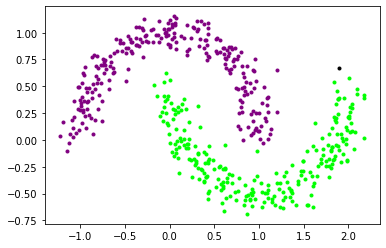

In [16]:

# clf.plotRes(X,l,c)

In [37]:
def gib_database(filename):
    with open(filename) as f:
        lines = f.readlines()
    db = []
    for point in lines:
        db.append(point.split())
    db = np.array(db, dtype=float)
    return db
db1 = gib_database("dataset1.txt")

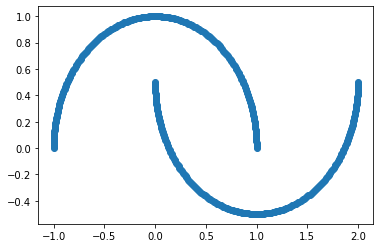

In [38]:
plt.scatter(db1[:,0],db1[:,1])

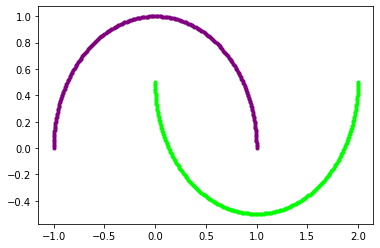

In [39]:
clf = cluster(euclid,0.1,10)
l,c = clf.dbscan(db1)
clf.plotRes(db1,l,c)


[[ 9.35907099e+00  3.37273060e-01]
 [-1.13610440e+00  4.22926378e+00]
 [-1.81808407e+00  4.65198469e+00]
 [-8.95225209e+00  5.98376238e+00]
 [-6.63603982e+00  5.60680144e+00]
 [ 7.24705013e-01  2.21967234e+00]
 [-9.37001667e-01  3.73305427e+00]
 [ 1.03384244e+01  9.19345105e-01]
 [ 1.06858637e+01  9.40408223e-01]
 [-2.08748916e+00  4.96750310e+00]
 [-1.00820719e+00  5.35358119e+00]
 [-1.97920476e+00  3.68672066e+00]
 [-8.73409814e+00  5.82983563e+00]
 [-7.73745625e+00  4.42545928e+00]
 [-9.38246008e+00  4.43918877e+00]
 [-6.94425458e+00  6.26779404e+00]
 [-8.71658329e+00  4.14513443e+00]
 [-9.26275724e+00  5.60044142e+00]
 [ 1.00122176e+01  1.06510000e+00]
 [-8.17315380e+00  6.81769473e+00]
 [-9.90879768e+00  6.09999997e+00]
 [-2.11686031e+00  4.18214566e+00]
 [-9.51396528e+00  5.62115381e+00]
 [ 9.36562893e+00 -3.89253466e-01]
 [ 9.26509834e+00  2.17391692e+00]
 [ 8.08417758e+00  1.55140263e+00]
 [ 3.80129438e-01  4.57120826e+00]
 [-8.05833160e+00  4.67483119e+00]
 [-9.00468796e+00  4

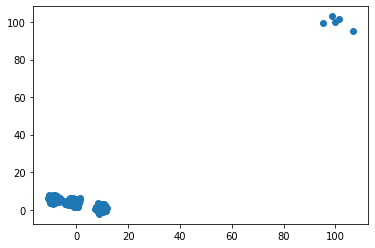

In [40]:
db2 = gib_database('dataset2.txt')
print(db2)
plt.scatter(db2[:,0],db2[:,1])

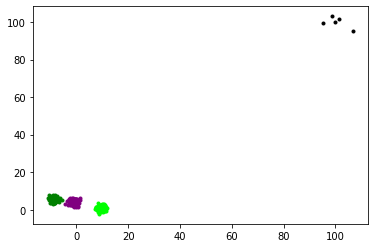

In [53]:
clf = cluster(euclid,1.5,4)
l,c = clf.dbscan(db2)
clf.plotRes(db2,l,c)